# Test

In [3]:
cd ../..

C:\Users\gauthieca\Desktop


In [13]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import *


import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

### Tests

In [5]:
kappas = [1,0.7,0.5,0.5,0.3]
thetas = [0.9,0.3,0.5,0.4,0.1,0.2,0.5,0.1,0.8,0.4]
nb_prop = len(thetas)
nb_place = len(kappas)
pas = 100
c = 0.5
env = Environment_PBM(thetas,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]

player_TSMH_s_03 = TS_MH(nb_prop,nb_place,part0,pas)
player_TSMH_s_01 = TS_MH(nb_prop,nb_place,part0,pas,sigma=0.1)
player_TSMH_s_1 = TS_MH(nb_prop,nb_place,part0,pas,sigma=1)
player_TSMH_s_vari = TS_MH_vari_sigme(nb_prop,nb_place,part0,pas)## c = 3
player_Oracle = Oracle(env.get_best_index())
player_Random = Random(nb_prop,nb_place)



In [56]:
nb_trial = 1000
nb_game = 3
referee_TSMH_s_03_1000trials_3game = Referee(env,nb_trial)
referee_TSMH_s_01_1000trials_3game = Referee(env,nb_trial)
referee_TSMH_s_1_1000trials_3game = Referee(env,nb_trial)
referee_TSMH_s_vari_1000trials_3game = Referee(env,nb_trial)
referee_Oracle_1000trials_3game = Referee(env,nb_trial)
referee_Random_1000trials_3game = Referee(env,nb_trial)

In [57]:
for i in range(nb_game):
    print ('#### game '+str(i))
    %time print('TSMH_s_03 ',referee_TSMH_s_03_1000trials_3game .play_game(player_TSMH_s_03))
    %time print('TSMH_s_01',referee_TSMH_s_01_1000trials_3game.play_game(player_TSMH_s_01))
    %time print('TSMH_s_1',referee_TSMH_s_1_1000trials_3game.play_game(player_TSMH_s_1))
    %time print('TSMH_s_vari',referee_TSMH_s_vari_1000trials_3game.play_game(player_TSMH_s_vari))
    %time print ('Oracle', referee_Oracle_1000trials_3game.play_game(player_Oracle))
    %time print('Random',referee_Random_1000trials_3game.play_game(player_Random))

#### game 0
TSMH_s_03  0.0
Wall time: 2min 20s
TSMH_s_01 0.0
Wall time: 3min 12s
TSMH_s_1 0.0
Wall time: 1min 23s
TSMH_s_vari 0.0
Wall time: 3min 18s
Oracle 0.0
Wall time: 12 ms
Random 0.5500000000000003
Wall time: 19.9 ms
#### game 1
TSMH_s_03  0.0
Wall time: 2min 43s
TSMH_s_01 0.0
Wall time: 2min 41s
TSMH_s_1 0.0
Wall time: 1min 40s
TSMH_s_vari 0.0
Wall time: 3min 25s
Oracle 0.0
Wall time: 20 ms
Random 0.7100000000000004
Wall time: 22.9 ms
#### game 2
TSMH_s_03  0.0
Wall time: 2min 53s
TSMH_s_01 0.0
Wall time: 3min 8s
TSMH_s_1 0.0
Wall time: 1min 20s
TSMH_s_vari 0.0
Wall time: 2min 42s
Oracle 0.0
Wall time: 8.98 ms
Random 0.40000000000000013
Wall time: 16 ms


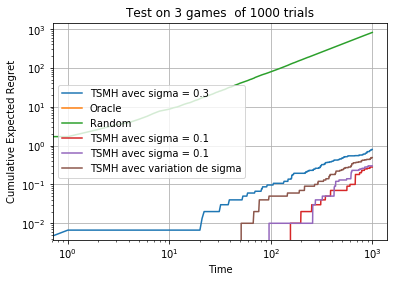

In [58]:
trials = [i for i in range(referee_TSMH_s_03_1000trials_3game.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH_s_03_1000trials_3game.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.3')
plt.plot(trials, np.cumsum(referee_Oracle_1000trials_3game.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_1000trials_3game.get_regret_expected(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_TSMH_s_01_1000trials_3game.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.1')
plt.plot(trials, np.cumsum(referee_TSMH_s_1_1000trials_3game.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 1')
plt.plot(trials, np.cumsum(referee_TSMH_s_vari_1000trials_3game.get_regret_expected(), axis=0)[trials], label='TSMH avec variation de sigma')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

In [9]:
nb_trial = 10000
nb_game = 3
referee_TSMH_s_03 = Referee(env,nb_trial)
referee_TSMH_s_01 = Referee(env,nb_trial)
referee_TSMH_s_1 = Referee(env,nb_trial)
referee_TSMH_s_vari = Referee(env,nb_trial)
referee_Oracle = Referee(env,nb_trial)
referee_Random = Referee(env,nb_trial)

In [10]:
for i in range(nb_game):
    print ('#### game '+str(i))
    %time print('TSMH_s_03 ',referee_TSMH_s_03 .play_game(player_TSMH_s_03))
    %time print('TSMH_s_01',referee_TSMH_s_01.play_game(player_TSMH_s_01))
    %time print('TSMH_s_1',referee_TSMH_s_1.play_game(player_TSMH_s_1))
    %time print('TSMH_s_vari',referee_TSMH_s_vari.play_game(player_TSMH_s_vari))
    %time print ('Oracle', referee_Oracle.play_game(player_Oracle))
    %time print('Random',referee_Random.play_game(player_Random))

#### game 0
TSMH_s_03  0.0
Wall time: 24min 5s
TSMH_s_01 0.0
Wall time: 24min 50s
TSMH_s_1 0.0
Wall time: 15h 34min 21s
TSMH_s_vari 0.0
Wall time: 40min 51s
Oracle 0.0
Wall time: 125 ms
Random 0.4099999999999999
Wall time: 700 ms
#### game 1
TSMH_s_03  0.0
Wall time: 34min 55s
TSMH_s_01 0.0
Wall time: 39min 22s
TSMH_s_1 0.0
Wall time: 18min 32s
TSMH_s_vari 0.0
Wall time: 45min 33s
Oracle 0.0
Wall time: 210 ms
Random 0.8600000000000001
Wall time: 373 ms
#### game 2
TSMH_s_03  0.0
Wall time: 1h 43min 49s
TSMH_s_01 0.0
Wall time: 24min 39s
TSMH_s_1 0.0
Wall time: 13min 15s
TSMH_s_vari 0.0
Wall time: 27min 47s
Oracle 0.0
Wall time: 103 ms
Random 1.1300000000000001
Wall time: 260 ms


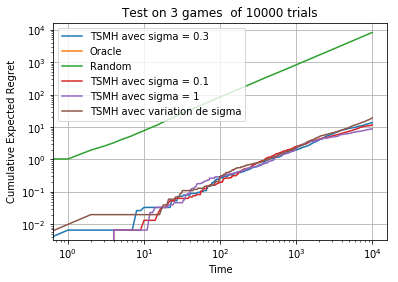

In [11]:
trials = [i for i in range(referee_TSMH_s_03.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH_s_03.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.3')
plt.plot(trials, np.cumsum(referee_Oracle.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random.get_regret_expected(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_TSMH_s_01.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.1')
plt.plot(trials, np.cumsum(referee_TSMH_s_1.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 1')
plt.plot(trials, np.cumsum(referee_TSMH_s_vari.get_regret_expected(), axis=0)[trials], label='TSMH avec variation de sigma')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

[2.33333333 2.66666667 2.66666667 ... 2.66666667 1.66666667 2.33333333]
[2.         1.66666667 2.33333333 ... 2.         1.33333333 2.66666667]
[1.66666667 1.         0.66666667 ... 2.         1.33333333 1.66666667]
[2.         2.66666667 2.33333333 ... 2.33333333 2.         2.33333333]
[2.33333333 1.66666667 2.33333333 ... 1.66666667 2.33333333 2.        ]
[1.66666667 2.66666667 2.         ... 2.33333333 1.33333333 2.33333333]


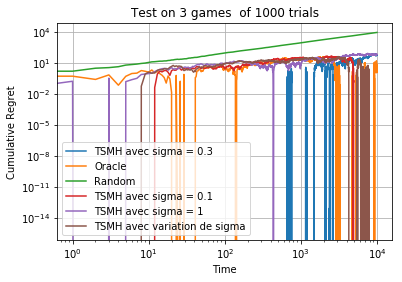

In [63]:
trials = [i for i in range(referee_TSMH_s_03.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH_s_03.get_regret(), axis=0)[trials], label='TSMH avec sigma = 0.3')
plt.plot(trials, np.cumsum(referee_Oracle.get_regret(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random.get_regret(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_TSMH_s_01.get_regret(), axis=0)[trials], label='TSMH avec sigma = 0.1')
plt.plot(trials, np.cumsum(referee_TSMH_s_1.get_regret(), axis=0)[trials], label='TSMH avec sigma = 1')
plt.plot(trials, np.cumsum(referee_TSMH_s_vari.get_regret(), axis=0)[trials], label='TSMH avec variation de sigma')

plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()

[2.33333333 2.66666667 2.66666667 ... 2.66666667 1.66666667 2.33333333]
[2.         1.66666667 2.33333333 ... 2.         1.33333333 2.66666667]
[1.66666667 1.         0.66666667 ... 2.         1.33333333 1.66666667]
[2.         2.66666667 2.33333333 ... 2.33333333 2.         2.33333333]
[2.33333333 1.66666667 2.33333333 ... 1.66666667 2.33333333 2.        ]
[1.66666667 2.66666667 2.         ... 2.33333333 1.33333333 2.33333333]


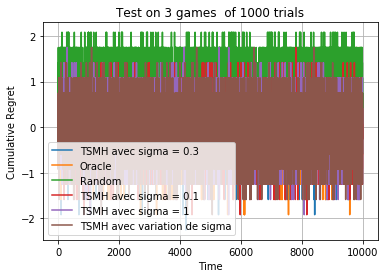

In [60]:
trials = [i for i in range(referee_TSMH_s_03.nb_trials)]
plt.plot(trials, referee_TSMH_s_03.get_regret()[trials], label='TSMH avec sigma = 0.3')
plt.plot(trials, referee_Oracle.get_regret()[trials], label='Oracle')
plt.plot(trials, referee_Random.get_regret()[trials], label='Random')
plt.plot(trials, referee_TSMH_s_01.get_regret()[trials], label='TSMH avec sigma = 0.1')
plt.plot(trials, referee_TSMH_s_1.get_regret()[trials], label='TSMH avec sigma = 1')
plt.plot(trials, referee_TSMH_s_vari.get_regret()[trials], label='TSMH avec variation de sigma')

plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
#plt.loglog()
plt.show()

### Enreigistrer les Log

In [20]:
cd bandits-to-rank/Test/interaction/result/eval_sigma/

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\eval_sigma


In [53]:
dict_regret_vari_sigma_10000trials_3game = {'TSMH_s_03':list(referee_TSMH_s_03.get_regret_expected()),
 'TSMH_s_01':list(referee_TSMH_s_01.get_regret_expected()),
 'TSMH_s_1':list(referee_TSMH_s_1.get_regret_expected()),
 'TSMH_s_vari':list(referee_TSMH_s_vari.get_regret_expected())}


In [55]:
with open('referee_TSMH_s_03_10000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_03.record_results, file)
with open('referee_TSMH_s_01_10000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_01.record_results, file)
with open('referee_TSMH_s_1_10000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_1.record_results, file)
with open('referee_TSMH_s_vari_10000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_vari.record_results, file)
with open('regret_vari_sigma_10000trials_3game.txt', 'w') as file:
    json.dump(dict_regret_vari_sigma_10000trials_3game, file)



In [67]:
dict_regret_vari_sigma_1000trials_3game = {'TSMH_s_03':list(referee_TSMH_s_03_1000trials_3game.get_regret_expected()),
 'TSMH_s_01':list(referee_TSMH_s_01_1000trials_3game.get_regret_expected()),
 'TSMH_s_1':list(referee_TSMH_s_1_1000trials_3game.get_regret_expected()),
 'TSMH_s_vari':list(referee_TSMH_s_vari_1000trials_3game.get_regret_expected())}


In [68]:
with open('referee_TSMH_s_03_1000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_03_1000trials_3game.record_results, file)
with open('referee_TSMH_s_01_1000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_01_1000trials_3game.record_results, file)
with open('referee_TSMH_s_1_1000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_1_1000trials_3game.record_results, file)
with open('referee_TSMH_s_vari_1000trials_3game.txt', 'w') as file:
    json.dump(referee_TSMH_s_vari_1000trials_3game.record_results, file)
with open('regret_vari_sigma_1000trials_3game.txt', 'w') as file:
    json.dump(dict_regret_vari_sigma_1000trials_3game, file)



In [ ]:
##lecture
##attention à etre dans le bon repertoir !
with open('regret_vari_sigma_1000trials_3game.txt', 'r') as file:
    dict_regret_vari_sigma_1000trials_3game = json.load(file)